In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import re
import itertools

from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score

import graphviz

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
master_titanic_train = pd.read_csv('train.csv')

In [4]:
master_titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
master_titanic_train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
types_master_train = master_titanic_train.dtypes
num_values = types_master_train[(types_master_train == float)]

print("Numerical features:")
print(num_values)


Numerical features:
Age     float64
Fare    float64
dtype: object


In [7]:
master_titanic_train[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [8]:
master_titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
# checking for NANs

print(pd.isnull(master_titanic_train).sum()) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


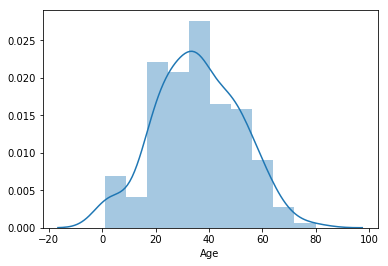

In [10]:
t_data = master_titanic_train.copy()
t_data.dropna(inplace = True)
sns.distplot(t_data["Age"])

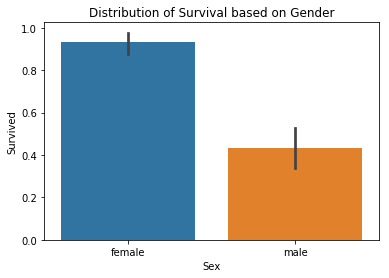

Total people survived is: 123
Proportion of Females who survived:
0.6666666666666666
Proportion of Males who survived:
0.3333333333333333


In [11]:
sns.barplot(x="Sex", y="Survived", data=t_data)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = t_data[t_data.Sex == "female"]["Survived"].sum()
total_survived_males = t_data[t_data.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

In [12]:
cabin = {"Cabin":"U"}
t_data = master_titanic_train.fillna(value=cabin)

In [13]:
t_data["Age"].fillna(t_data["Age"].median(), inplace = True)

In [14]:
t_data["Embarked"].fillna("S", inplace = True)

In [15]:
t_data['Cabin'] = t_data['Cabin'].apply(lambda x: x[0] if x != 'U' else 'U')

In [16]:
t_data['Salutation'] = t_data['Name'].apply(lambda x: re.findall(r'\b\w+[.]', x)[0])

In [17]:
t_data['Pclass'] = t_data['Pclass'].astype('category')
t_data['Sex'] = t_data['Sex'].astype('category')
t_data['Cabin'] = t_data['Cabin'].astype('category')
t_data['Embarked'] = t_data['Embarked'].astype('category')
t_data['Salutation'] = t_data['Salutation'].astype('category')

In [18]:
t_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss.


In [19]:
t_data = t_data.drop(['Name','Ticket'], axis=1)

In [20]:
t_data.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Salutation
0,1,0,3,male,22.0,1,0,7.2500,U,S,Mr.
1,2,1,1,female,38.0,1,0,71.2833,C,C,Mrs.
2,3,1,3,female,26.0,0,0,7.9250,U,S,Miss.


In [21]:
t_target = t_data['Survived']

In [22]:
t_data = t_data.drop(['Survived'], axis=1)
t_data = t_data.drop(['PassengerId'], axis=1)

In [23]:
t_data['Salutation'] = t_data['Salutation'].astype('category')

In [24]:
t_data_onehot = pd.get_dummies(t_data, columns=['Sex', 'Pclass', 'Cabin', 'Embarked'], prefix=['Sex', 'Pclass', 'Cabin', 'Embarked'])
t_data_onehot.head(5)

,Age,SibSp,Parch,Fare,Salutation,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,Mr.,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,71.2833,Mrs.,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,26.0,0,0,7.9250,Miss.,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,Mrs.,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,0,0,8.0500,Mr.,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1


### Quick peak at how the data may split

In [25]:
t_train_data, t_test_data, t_train_tgt, t_test_tgt = train_test_split(t_data_onehot, t_target, test_size = 0.3, stratify=t_target)

In [26]:
t_train_data = t_train_data.drop(['Salutation'], axis=1)
t_test_data = t_test_data.drop(['Salutation'], axis=1)

In [27]:
clf_quick_dt = dt(criterion='gini', splitter='best', max_depth=6, min_samples_split=10, min_samples_leaf=5, max_features='log2')
clf_quick_dt = clf_quick_dt.fit(t_train_data, t_train_tgt)

In [28]:
pred_quick_dt = clf_quick_dt.predict(t_test_data)

In [29]:
t_train_data.keys()

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

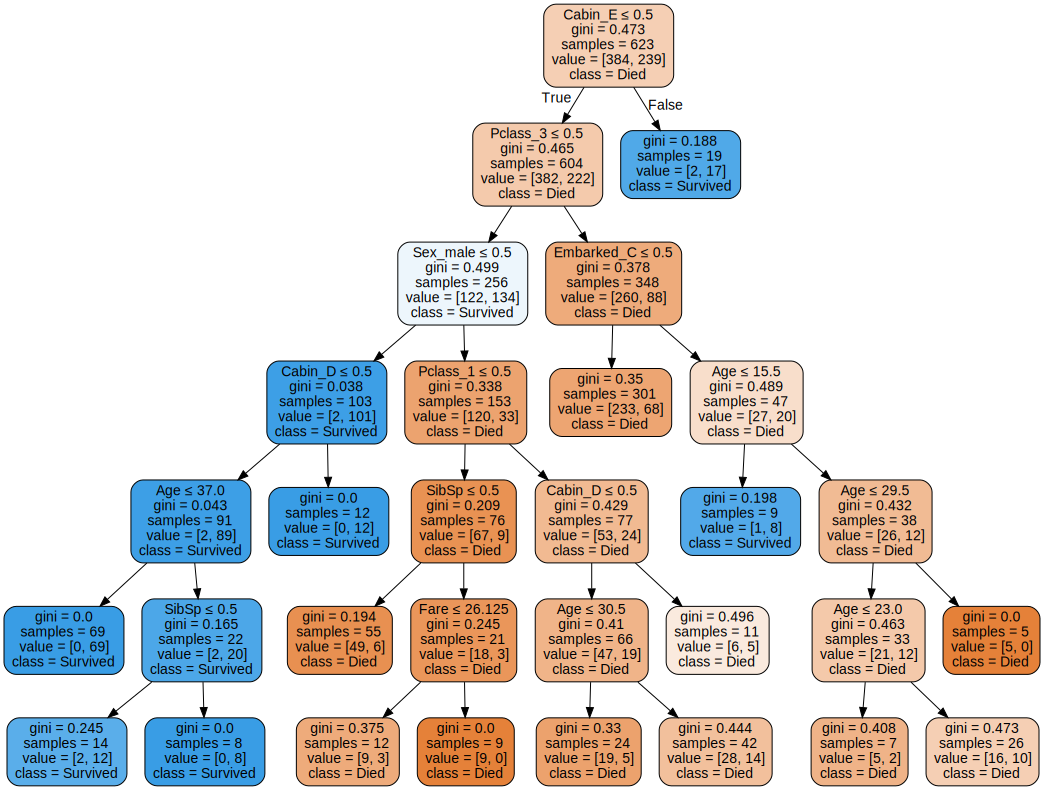

In [30]:
dot_data = export_graphviz(clf_quick_dt, out_file=None, feature_names=t_train_data.keys(), class_names= ['Died', 'Survived'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

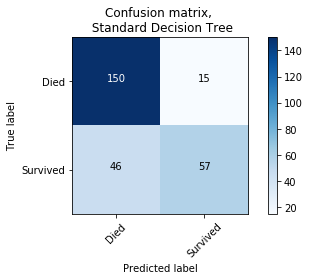

In [31]:
cnf_matrix = confusion_matrix(t_test_tgt, pred_quick_dt)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Died', 'Survived'],
                      title='Confusion matrix, \n Standard Decision Tree')

In [32]:
print(classification_report(t_test_tgt, pred_quick_dt, target_names=['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.77      0.91      0.83       165
    Survived       0.79      0.55      0.65       103

   micro avg       0.77      0.77      0.77       268
   macro avg       0.78      0.73      0.74       268
weighted avg       0.78      0.77      0.76       268



In [33]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_auc_score(t_test_tgt, pred_quick_dt)

0.731244483671668

In [34]:
# accuracy of model
accuracy_score(t_test_tgt, pred_quick_dt)

0.7723880597014925

## Gradient Boosted Classifier

In [35]:
clf_gbc = GradientBoostingClassifier()
clf_gbc = clf_gbc.fit(t_train_data, t_train_tgt)

In [36]:
pred_gbc = clf_gbc.predict(t_test_data)

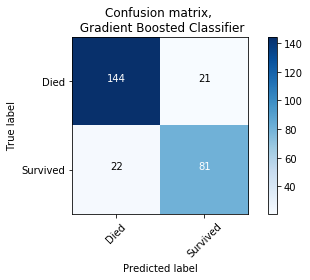

In [37]:
cnf_matrix = confusion_matrix(t_test_tgt, pred_gbc)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Died', 'Survived'],
                      title='Confusion matrix, \n Gradient Boosted Classifier')

In [38]:
print(classification_report(t_test_tgt, pred_gbc, target_names=['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.87      0.87      0.87       165
    Survived       0.79      0.79      0.79       103

   micro avg       0.84      0.84      0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268



In [39]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_auc_score(t_test_tgt, pred_gbc)

0.8295675198587821

In [40]:
# accuracy of model
accuracy_score(t_test_tgt, pred_gbc)

0.8395522388059702

## Random Forest

In [41]:
clf_rf = RandomForestClassifier(n_estimators=200)
clf_rf = clf_rf.fit(t_train_data, t_train_tgt)

In [42]:
pred_rf = clf_rf.predict(t_test_data)

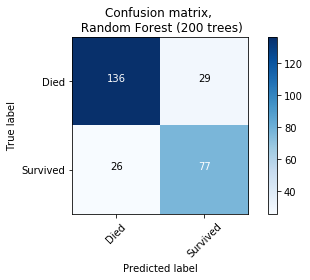

In [43]:
cnf_matrix = confusion_matrix(t_test_tgt, pred_rf)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Died', 'Survived'],
                      title='Confusion matrix, \n Random Forest (200 trees)')

In [44]:
print(classification_report(t_test_tgt, pred_rf, target_names=['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.84      0.82      0.83       165
    Survived       0.73      0.75      0.74       103

   micro avg       0.79      0.79      0.79       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.80      0.79      0.80       268



In [45]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_auc_score(t_test_tgt, pred_rf)

0.7859076198882025

In [46]:
# accuracy of model
accuracy_score(t_test_tgt, pred_rf)

0.7947761194029851

## Bagging Classifier

In [47]:
clf_bag = BaggingClassifier()
clf_bag = clf_bag.fit(t_train_data, t_train_tgt)

In [48]:
pred_bag = clf_bag.predict(t_test_data)

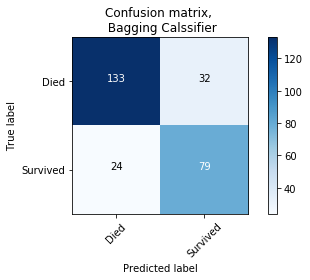

In [49]:
cnf_matrix = confusion_matrix(t_test_tgt, pred_bag)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Died', 'Survived'],
                      title='Confusion matrix, \n Bagging Calssifier')

In [50]:
print(classification_report(t_test_tgt, pred_bag, target_names=['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.85      0.81      0.83       165
    Survived       0.71      0.77      0.74       103

   micro avg       0.79      0.79      0.79       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.80      0.79      0.79       268



In [51]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_auc_score(t_test_tgt, pred_bag)

0.786525448661371

In [52]:
# accuracy of model
accuracy_score(t_test_tgt, pred_bag)

0.7910447761194029